# **Week 9: Small Sample Inference - Hypothesis Testing**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```

Through the following examples, we will explore the concepts of (small-sample) hypothesis testing (SSHT) and examine their practical implications.


## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Packages**
**Run the following lines of code**:

In [74]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

**Do not modify the following**

In [75]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "knitr") %in% loadedNamespaces()))

})

Test passed 🎉


## **Reference Tables for SSHT for Sample Means**

| Scenario | Parameter | Null hypothesis | Test statistic (t) | Degrees of freedom ($\nu$) under $H_0$ |
|----------|-----------|-----------------|--------------------|--------------------------------|
| 1, One-sample mean | $\mu$ | $\mu = \mu_0$ | $t = \dfrac{\bar{x} - \mu_0}{s / \sqrt{n}}$ | $n - 1$ |
| 2, Paired sample (dependent) | $\mu_D$ (mean difference) | $\mu_D = d_0$ | $t = \dfrac{\bar{d} - d_0}{s_d / \sqrt{n}}$ | $n - 1$ |
| 3, Two-sample mean, equal variances (pooled) | $\mu_1 - \mu_2$ | $\mu_1 - \mu_2 = d$ | $s_p^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}$. <br> $t = \dfrac{\bar{x}_1 - \bar{x}_2 - d}{s_p \sqrt{\tfrac{1}{n_1} + \tfrac{1}{n_2}}}$ | $n_1 + n_2 - 2$ |
| 4, Two-sample mean, unequal variances (Welch's) | $\mu_1 - \mu_2$ | $\mu_1 - \mu_2 = d$ | $t = \dfrac{\bar{x}_1 - \bar{x}_2 - d}{\sqrt{\tfrac{s_1^2}{n_1} + \tfrac{s_2^2}{n_2}}}$ | $\dfrac{\big(\tfrac{s_1^2}{n_1} + \tfrac{s_2^2}{n_2}\big)^2}{\tfrac{s_1^4}{n_1^2(n_1-1)} + \tfrac{s_2^4}{n_2^2(n_2-1)}}$ | |



Assuming that data are i.i.d. generated from a Gaussian distribution (two dependent Gaussians for scenario 2; and two **independent** Gaussians for scenario 3 and 4), under the null hypothesis, the $t$ test statistics in the reference tables are approximately distributed as a Student's $T$ distribution with a number of degrees of freedom specified in the reference table. This implies a significant deviation from Gaussianity might weaken the tests (especially when data are heavily skewed or contain outliers).

These $t$ tests are particularly useful when sample sizes are small, since the heavier tails of the $t$ distribution provide more accurate critical values. For large samples, however, the $T$ distribution converges to the standard normal distribution, and the tests reduce to the $z$-tests considered earlier in LSHT. Usually, n > 30 is sufficient.

Any substantial deviation from the null hypothesis will tend to produce $t$ values that are unlikely under these $T$ distributions, which is why extreme values of $t$ provide evidence against $H_0$.

| Test Type | Alternative Hypothesis | Rejection Region |
|-----------|----------------------|----------------|
| One-sided (right) | $H_1: \theta > \theta_0$ | Reject $H_0$ if $t > t_{\nu
  , 1-\alpha}$ |
| One-sided (left) | $H_1: \theta < \theta_0$ | Reject $H_0$ if $t < t_{\nu, \alpha}$ |
| Two-sided | $H_1: \theta \neq \theta_0$ | Reject $H_0$ if $|t| > t_{\nu, 1-\alpha/2}$ |

Even though any deviation from $H_0$ can provide evidence against it, the choice between a one-sided and a two-sided test depends on our research goal and the direction of interest.

If we specifically care about deviations in one direction — for example, testing whether the average battery life is less than 8 hours — an one-sided test is appropriate. Allocating all of the Type I error $\alpha$ to that direction increases the test’s ability to detect deviations that matter in practice.

On the other hand, if deviations in either direction are meaningful — for instance, testing whether the average rating of a show differs from 7.7, whether higher or lower — a two-sided test is necessary. Splitting $\alpha$ between both tails ensures we properly account for evidence against $H_0$ in either direction.


#### **Reference Table for Small Sample Confidence Intervals**
| Scenario | Parameter | Confidence Interval (CI) | Degrees of freedom ($\nu$) |
|----------|-----------|--------------------------|---------------------------|
| 1, One-sample mean | $\mu$ | $\bar{x} \pm t_{\nu, 1-\alpha/2} \frac{s}{\sqrt{n}}$ | $n - 1$ |
| 2, Paired sample (dependent) | $\mu_D$ (mean difference) | $\bar{d} \pm t_{\nu, 1-\alpha/2} \frac{s_d}{\sqrt{n}}$ | $n - 1$ |
| 3, Two-sample mean, equal variances (pooled) | $\mu_1 - \mu_2$ | $(\bar{x}_1 - \bar{x}_2) \pm t_{\nu, 1-\alpha/2} \cdot s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}$ <br> where $s_p^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}$| $n_1 + n_2 - 2$ |
| 4, Two-sample mean, unequal variances (Welch's) | $\mu_1 - \mu_2$ | $(\bar{x}_1 - \bar{x}_2) \pm t_{\nu, 1-\alpha/2} \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$ | $\dfrac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{\frac{s_1^4}{n_1^2(n_1-1)} + \frac{s_2^4}{n_2^2(n_2-1)}}$ |



##**When to Use The Welsch's $t$-test?**


Welch's $t$-test is more robust than the pooled-variance two-sample $t$-test because it does not assume equal population variances. It should be used when the two samples are independent and there is evidence that the variances differ.

- **Advantage:** Handles unequal variances and sample sizes reliably.  
- **Disadvantage:** Slightly less efficient (less power) than the pooled test if the population variances are actually equal.  

**Rule of Thumb:**  
If  
$$
\frac{\text{larger } s^2}{\text{smaller } s^2} > 3,
$$  
then  use  Welch's $t$-test; otherwise, the pooled-variance $t$-test is usually **acceptable**.

## **Performing `t.test` in R**

R provides a built-in function `t.test()` to perform hypothesis testing on means using the Student’s t-distribution. It can handle:

- One-sample t-tests
- Two-sample t-tests (equal or unequal variance)
- Paired-sample t-tests

It also handles small-sample confidence intervals on means (Gaussianity assumed).




### **Vector Interface `t.test` - Default Usage**

**Usage:**

```r
t.test(x, y = NULL,
       alternative = c("two.sided", "less", "greater"),
       mu = 0,
       paired = FALSE,
       var.equal = FALSE,
       conf.level = 0.95)
```

**Arguments:**

- `x`: numeric vector of data (one-sample or first sample)
- `y`: numeric vector of second sample (for two-sample tests)
- `mu`: Hypothesised mean for one-sample tests, or hypothesised difference for paired/two-sample tests
- `alternative`: `"two.sided"` (default), `"less"`, `"greater"`
- `paired`: TRUE for paired-sample test, FALSE for independent samples
- `var.equal`: TRUE for pooled-variance two-sample test, FALSE for Welch’s test
- `conf.level`: confidence level for interval (default 0.95)

#### **Reference Table**
| Scenario              | x             | y             | paired | var.equal | mu / difference under H0 |
|------------------------|---------------|---------------|--------|-----------|--------------------------|
| One-sample             | data          | -             | FALSE  | -         | hypothesised mean        |
| Two-sample Pooled      | sample1       | sample2       | FALSE  | TRUE      | hypothesised difference  |
| Two-sample Welch's       | sample1       | sample2       | FALSE  | FALSE     | hypothesised difference  |
| Paired-sample          | before        | after         | TRUE   | -         | hypothesised mean difference   |



### **Formula Interface**

The `t.test` function also provides a **formula interface**, which is often more convenient when working with `data.frame`s.  

- It is still the **same function** as the vector interface, but behaves differently depending on the input type.  
- Internally, `t.test` is an **S3 generic** in R, meaning it has different methods depending on whether you pass a numeric vector or a formula.  
- This is why we saw the **vector interface** earlier, and now we have the **formula interface**.

**Usage:**

```r
t.test(formula, data,
       subset,
       na.action,
       alternative = c("two.sided", "less", "greater"),
       mu = 0,
       paired = FALSE,
       var.equal = FALSE,
       conf.level = 0.95)
```

**Arguments:**

- `formula`: A formula describing the model, e.g. `response ~ group` for two-sample tests, or `response` for one-sample tests  
- `data`: The data frame containing the variables in the formula  
- `subset`: Optional logical vector to select a subset of the data  
- `na.action`: How to handle missing values (`na.omit` by default)  
- `alternative`: `"two.sided"` (default), `"less"`, or `"greater"`  
- `mu`: Hypothesised mean for one-sample tests, or hypothesised difference for paired/two-sample tests  
- `paired`: `TRUE` for paired-sample test, `FALSE` for independent samples  
- `var.equal`: `TRUE` for pooled-variance two-sample test, `FALSE` for Welch’s test  
- `conf.level`: Confidence level for the interval (default 0.95)

A **`formula`** specifies which column contains the response variable (numeric values) and which column contains the grouping variable (factor).  
  - Typical form: `response ~ group`  
  - For a one-sample test, you can just use `response` (no grouping variable needed).  
- Data should ideally be in **long format**, where one column specifies the measured values, and another column specifies the group/label. This is especially useful for multiple groups.


#### **Reference Table**

| Scenario              | Formula                         | paired | var.equal | mu / difference under H0 |
|-----------------------|---------------------------------|--------|-----------|--------------------------|
| One-sample            | response ~ 1                     | FALSE  | -         | hypothesised mean        |
| Two-sample Pooled     | response ~ group, var.equal=TRUE | FALSE  | TRUE      | hypothesised difference  |
| Two-sample Welch's    | response ~ group                 | FALSE  | FALSE     | hypothesised difference  |
| Paired-sample         | (response_after - response_before) ~ 1 | TRUE   | -         | hypothesised mean difference |





### **Examples**

The `sleep` dataset contains extra hours of sleep gained by 20 patients under two different drugs.

Through out this section, we assume a 95% significance level.

In [76]:
sleep %>% str()

'data.frame':	20 obs. of  3 variables:
 $ extra: num  0.7 -1.6 -0.2 -1.2 -0.1 3.4 3.7 0.8 0 2 ...
 $ group: Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ ID   : Factor w/ 10 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...


#### **Example 1: One-Sample t-test**

Is there any evidence that the average extra sleep (in hours) of the first group different from 1?



Let $x_1, \dots, x_{n_1}$ be the extra sleep hours gained by patients in the group `"1"` in the `sleep` dataset. We assume that

$$
x_1, \dots, x_{n_1} \sim \text{i.i.d. } \mathcal{N}(\mu, \sigma^2)
$$

We want to test whether there is any evidence that the average extra sleep (in hours) of the first group is different from 1. Formally, the hypotheses are:
$$
\begin{align}
H_0: \mu &= 1 \\
H_1: \mu &\neq 1
\end{align}
$$

Since the sample size is small, a $t$-test might be appropriate here.

In [77]:
sleep %>% filter(group == "1") -> group1
group1 %>% str()

'data.frame':	10 obs. of  3 variables:
 $ extra: num  0.7 -1.6 -0.2 -1.2 -0.1 3.4 3.7 0.8 0 2
 $ group: Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1
 $ ID   : Factor w/ 10 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10


The following code cells give equivalent `t.test` results.

In [78]:
t.test(group1$extra, mu = 1, alternative = "two.sided")


	One Sample t-test

data:  group1$extra
t = -0.4419, df = 9, p-value = 0.669
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 -0.5297804  2.0297804
sample estimates:
mean of x 
     0.75 


In [79]:
t.test(extra~1, data = group1, mu = 1, alternative = "two.sided")


	One Sample t-test

data:  extra
t = -0.4419, df = 9, p-value = 0.669
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 -0.5297804  2.0297804
sample estimates:
mean of x 
     0.75 


##### **What Does the Summary from `t.test` Tell Us?**

`t.test()` by default generates a **statistical summary**, which includes:

- $t$-statistic: the value of the test statistic for the t-test  
- Degrees of freedom (df): for the $t$-distribution under the null hypothesis  
- p-value: the probability of observing a value as extreme (or more extreme) than the observed test statistic, assuming the null hypothesis is true  
  - If the **p-value is smaller than the significance level** $\alpha$, it is equivalent to rejecting the null hypothesis in the Neyman-Pearson framework. Quite handy, isn't it.

- Confidence interval (CI): a plausible range of for population mean (by default, a symmetric CI at 95% confidence level).
  - If the hypothesised value under `H0` lies **outside** this interval, it corresponds to rejecting `H0` at the same significance level. **This is a nice connection between confidence interval and hypothesis testing**.

Quite handy, isn't it?  

**Note that definition and interpretation of p-values are not covered in this unit (yet).** To make a decision (whether or not to reject the null hypothesis), we may need to check whether or not the $t$ test statistics in in the rejection region. You can save the `t.test` output to a variable and then use that to extract quantities of interest.





In [80]:
t.test(group1$extra, mu = 1, alternative = "two.sided") -> output
output$statistic #test-statistics
output$parameter #DF

t 
-0.4419034

df 
 9

We need to compare the absolute value of the $t$-statistic (as it is a two-sided test) to a critical value.  In this case, the critical value is the 97.5th percentile of the Student’s t-distribution with 9 degrees of freedom.  

If the absolute value of the t-statistic exceeds this critical value, we reject the null hypothesis at the 95% significance level.


In [81]:
abs(output$statistic) > qt(0.975, df = 9)
#Do not reject the null hypothesis

t 
FALSE

#### **Is The Gaussian Assumption Valid?**

We can use `qqplot` to check the **validity of the Gaussian assumption**. (There are formal tests for normality, but these are out of the scope of this unit.)  

However, this approach is not perfect, especially with small sample sizes (here, n = 10). Looking at the QQ-plot below, the points are not perfectly aligned with the theoretical line, but this could simply be due to random variation. In this example, we do **not see any substantially different values**, which would indicate extreme values or outliers (hence, non-Gaussianity).  

Reading a QQ-line is more like an **art than a strict rule**. You need to be flexible enough to recognise differences, while considering that small deviations may be due to chance.  

To master QQ-plot reading, try different distributions, explore various sample sizes, and observe how point alignment and deviations change. This experience will help you interpret QQ-plots more effectively.


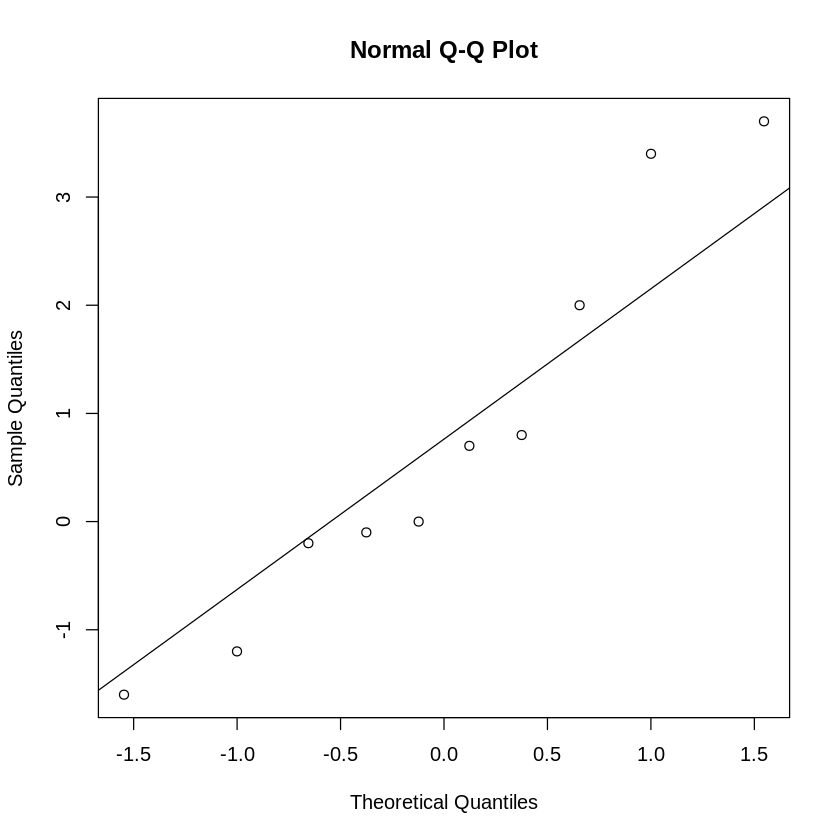

In [82]:
qqnorm(group1$extra)
qqline(group1$extra)

#### **Example 2: Two-Sample t-test**

Is there a difference in the mean extra sleep hours between patients taking Drug `"1"` and Drug `"2"`?


Note that the `sleep` dataset is already in the long format, where `extra` is the response variable and `group` shows the labels.

In [83]:
sleep %>% kable()



| extra|group |ID |
|-----:|:-----|:--|
|   0.7|1     |1  |
|  -1.6|1     |2  |
|  -0.2|1     |3  |
|  -1.2|1     |4  |
|  -0.1|1     |5  |
|   3.4|1     |6  |
|   3.7|1     |7  |
|   0.8|1     |8  |
|   0.0|1     |9  |
|   2.0|1     |10 |
|   1.9|2     |1  |
|   0.8|2     |2  |
|   1.1|2     |3  |
|   0.1|2     |4  |
|  -0.1|2     |5  |
|   4.4|2     |6  |
|   5.5|2     |7  |
|   1.6|2     |8  |
|   4.6|2     |9  |
|   3.4|2     |10 |

Let $x_1, \dots, x_{n_1}$ and $y_1, \dots, y_{n_2}$  be the extra sleep hours gained by patients in the groups `"1"` and `"2"` in the `sleep` dataset. We assume that

$$
x_1, \dots, x_{n_1} \sim \text{i.i.d. } \mathcal{N}(\mu_1, \sigma_1^2)
$$

$$
y_1, \dots, y_{n_2} \sim \text{i.i.d. } \mathcal{N}(\mu_2, \sigma_2^2)
$$


We want to test whether there is any evidence that the average extra sleep hours of the two groups are diffent. Formally, the hypotheses are:
$$
\begin{align}
H_0: \mu_1 - \mu_2 &= 0 \\
H_1: \mu_1 - \mu_2 &\neq 0
\end{align}
$$

This is **not a paired sample**, since patients are allocated into two separate groups, and no patient takes both drugs.  It is also reasonable to assume that these two populations are **independent**, at least in this example, where we assume the study is well-signed, but this assumption may not always hold in practice.  

*A quick detour from what we are doing…* Various factors can compromise independence, for example:  

- If patients know which drug they are taking, their behavior or reporting may be affected (placebo effect, expectations, or bias).  
- If there is some systematic way in which patients are assigned to groups, the two samples may not be truly independent.  

Always think critically about whether the **independence assumption** is valid for your study.


***Back to the question***, given the sample sizes, we can use a two-sample t-test. Which one to use? Let's take a look at box plots of `extra` for the two groups.

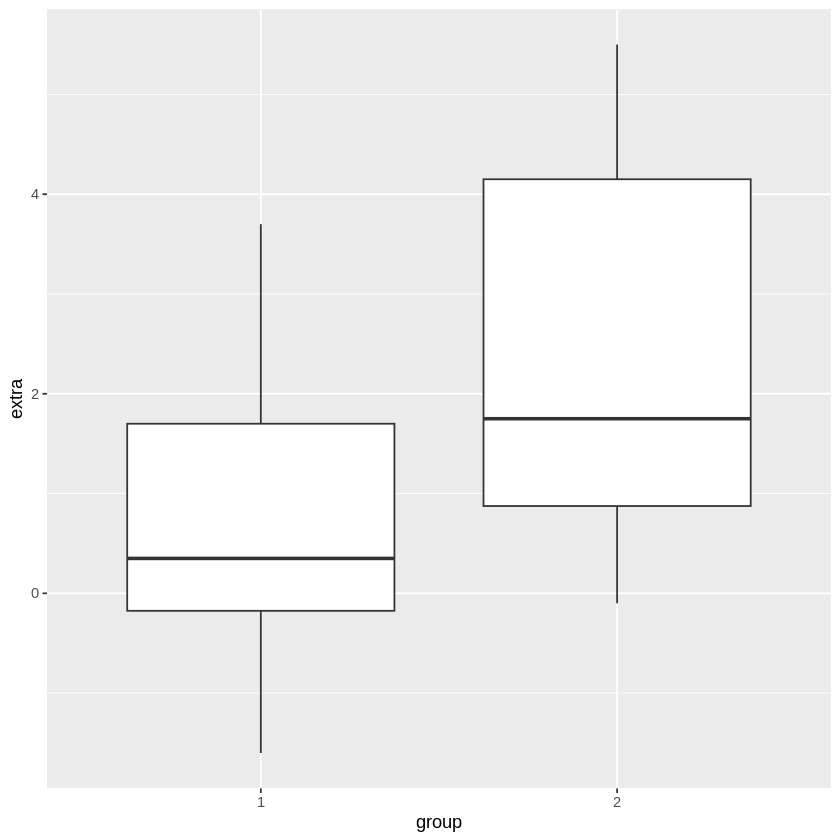

In [84]:
sleep %>%
  ggplot(aes(x = group, y = extra)) +
  geom_boxplot()

Group 2 seems to have a higher average of extra hours of sleep, and the IQR appears to be roughly double that of group 1. There do not seem to be any outliers in either group.  The median in group 2 appears to be slightly shifted towards the 25% quantile, which could suggest non-Gaussianity.

However, these might also be due to random variation, especially since the sample size for each group is quite small. We can also check the **rule of thumb** discussed earlier to decide whether to use the pooled-variance t-test or Welch's test.


In [85]:
sleep %>%
  group_by(group) %>%
  summarise(smpl_var = var(extra)) -> group_vars

group_vars

group_vars %>% pull(smpl_var) %>% max / group_vars %>% pull(smpl_var) %>% min

group,smpl_var
<fct>,<dbl>
1,3.200556
2,4.009000


[1] 1.252595

As

$$
\frac{\text{larger } s^2}{\text{smaller } s^2} = \frac{4.009000}{3.200556} \approx 1.25 < 3,
$$  

We can use the pooled-variance t-test in this example. The following code cells give the same outputs.

In [86]:
t.test(x = sleep %>% filter(group == "1") %>% pull(extra),
       y = sleep %>% filter(group == "2") %>% pull(extra),
       mu = 0, alternative = "two.sided", var.equal = TRUE)


	Two Sample t-test

data:  sleep %>% filter(group == "1") %>% pull(extra) and sleep %>% filter(group == "2") %>% pull(extra)
t = -1.8608, df = 18, p-value = 0.07919
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.363874  0.203874
sample estimates:
mean of x mean of y 
     0.75      2.33 


Here, the p-value suggests no rejection of $H_0$ at 95% significance level. We can also compare the absolute value of test statistic (two-sided test) to  the 97.5th percentile of the Student’s t-distribution with 18 degrees of freedom (10 + 10 - 2).

In [87]:
t.test(extra ~ group, data = sleep, mu = 0, alternative = "two.sided", var.equal = TRUE) -> output
abs(output$statistic) > qt(0.975, df = 18)
# Do not reject the null hypothesis

t 
FALSE

### **Exercise**

Is there a difference in the mean extra sleep hours between patients taking Drug "1" and Drug "2"?  

Perform a **Welch’s t-test** to test this hypothesis using `t.test` function and compare the results to the previous two-sample t-test obtained using the pooled variance.




<details>
<summary>▶️ Click to show the solution</summary>

```r
t.test(extra ~ group, data = sleep, mu = 0, alternative = "two.sided", var.equal = FALSE) -> output
output
abs(output$statistic) > qt(0.975, df = output$parameter)
#Do not reject the null hypothesis
```

</details>


## **The T Statistical Table**



This table shows the critical t-values for the Student’s t-distribution at various degrees of freedom (df) and significance levels ($\alpha$). Historically, such tables were used in textbooks and labs before computers to quickly determine whether a t-statistic was extreme enough to reject the null hypothesis.  

Mathematically, each value corresponds to a quantile of the cumulative distribution function (CDF) of the $t$-distribution. For example, the entry for df = 10 and $\alpha = 0.05$ is the 95th percentile of the t-distribution with 10 degrees of freedom, which is the critical value for a **one-sided right-tailed test at the 5% significance level**, or equivalently, for a **two-sided test at the 10% significance level**.

This allows you to compare your observed t-statistic directly to the table value to decide whether to reject the null hypothesis.

**VERY IMPORTANT:** Note that variations of t-statistic tables exist. Some show **two-sided critical values** ($1 - \alpha/2$ quantile), some show **one-sided critical values** ($1 - \alpha$ quantile), and some show both. Be careful when using these tables, know which convention is being used, and ask for clarification if it is unclear.

**Note**: This table only shows integer $\nu$. If a fractional number of degrees of freedom is encountered (as in Welch’s test), round it to the **nearest df**.



In [89]:
generateTTable()



|      | alpha=0.2| alpha=0.1| alpha=0.05| alpha=0.025| alpha=0.01| alpha=0.005| alpha=0.001|
|:-----|---------:|---------:|----------:|-----------:|----------:|-----------:|-----------:|
|df=1  |    1.3764|    3.0777|     6.3138|     12.7062|    31.8205|     63.6567|    318.3088|
|df=2  |    1.0607|    1.8856|     2.9200|      4.3027|     6.9646|      9.9248|     22.3271|
|df=3  |    0.9785|    1.6377|     2.3534|      3.1824|     4.5407|      5.8409|     10.2145|
|df=4  |    0.9410|    1.5332|     2.1318|      2.7764|     3.7469|      4.6041|      7.1732|
|df=5  |    0.9195|    1.4759|     2.0150|      2.5706|     3.3649|      4.0321|      5.8934|
|df=6  |    0.9057|    1.4398|     1.9432|      2.4469|     3.1427|      3.7074|      5.2076|
|df=7  |    0.8960|    1.4149|     1.8946|      2.3646|     2.9980|      3.4995|      4.7853|
|df=8  |    0.8889|    1.3968|     1.8595|      2.3060|     2.8965|      3.3554|      4.5008|
|df=9  |    0.8834|    1.3830|     1.8331|      2.2622|   

## **Workshop Questions**




### **Question 1: Which t-test to Use?**

For each of the following scenarios, decide which type of t-test should be used (one-sample, two-sample pooled, Welch’s, or paired-sample) and explain your reasoning.

**Scenarios:**

1. Measure the heart rate of participants before and after swimming.

2. A factory claims that the average weight of cereal boxes is 500 grams. You collect a sample of boxes and measure their weights.

3. Compare math test scores between students taught with method A and students taught with method B.

4. Compare math test scores of students who take both specialist maths and regular maths.

5.  Measure the heart rate of participants after drinking Coffee 1. One week later, the same participants drink Coffee 2 and their heart rate is measured again. Compare the heart rates between the two types of coffee.






<details>
<summary>▶️ Click to show the solution</summary>

1. Paired-sample t-test can be used as the same participants are measured twice (before and after), so the measurements are dependent.

2. One-sample t-test can be used as you are comparing a sample mean to a known/hypothesised population mean, which is exactly what a one-sample t-test is designed for.

3. Two-sample pooled t-test (or Welch’s t-test if unequal variance is suspected) can be used as it is reasonable to assume independent populations here.

4. Paired-sample t-test can be used as the same students are measured in two subjects, making the data *dependent.

5. Paired-sample t-test can be used because the same participants are measured after two conditions, making the data dependent (e.g., both measurements depend on each participant's baseline heart rate).



</details>


### **Question 2**

A geologist collected twenty ore samples and randomly divided them into two separate groups. She then used two different techniques to measure the amount of titanium present in the samples. The data are:

In [114]:
group1 = c(0.011,0.013,0.013,0.015,0.014,0.013,0.010,0.013,0.011,0.012)
group2 = c(0.008,0.018,0.015,0.017,0.017,0.012,0.012,0.015,0.016,0.016)

Perform hypothesis testing to evaluate whether these two methods of taking measurements are equivalent. Now multiply the measurements by 1000, do you expect your test results to be any different? Repeat the test and compare the results. Use $\alpha = 0.05$.

In [145]:
group1 = c(0.011,0.013,0.013,0.015,0.014,0.013,0.010,0.013,0.011,0.012)
group2 = c(0.008,0.018,0.015,0.017,0.017,0.012,0.012,0.015,0.016,0.016)



<details>
<summary>▶️ Click to show the solution</summary>

Let $x_1, \dots, x_{10}$ denote the measurements of titanium in ore samples using **instrument 1** (`group1`), and $y_1, \dots, y_{10}$ denote the measurements using **instrument 2** (`group2`). Assuming the measurements are independent and normally distributed:

$$
x_1, \dots, x_{10} \sim \text{i.i.d. } \mathcal{N}(\mu_1, \sigma_1^2)
$$
$$
y_1, \dots, y_{10} \sim \text{i.i.d. } \mathcal{N}(\mu_2, \sigma_2^2)
$$

Formally, the hypotheses are:

$$
H_0: \mu_1 - \mu_2 = 0 \\
H_1: \mu_1 - \mu_2 \neq 0
$$

It is reasonable to assume independent populations here. We can use a two-sample $t$-test (for example, with `var.equal = FALSE`).

```r
group1 = c(0.011,0.013,0.013,0.015,0.014,0.013,0.010,0.013,0.011,0.012)
group2 = c(0.011,0.016,0.013,0.012,0.015,0.012,0.017,0.013,0.014,0.015)
#var.equal = FALSE
t.test(group1, group2)
t.test(group1 * 1000, group2 * 1000)

```

The null hypothesis $H_0: \mu_1 - \mu_2 = 0$ is not affected by multiplying both groups by a common constant. Moreover, the standard deviation is scaled by the same factor as the mean difference, the $t$-statistic remains unchanged, and the test produces the same result.

Since both CIs do contain 0, we do not reject the null hypothesis at 95% significance level.

</details>


### **Question 3**


Oh no!!! The geologist in **Question 2** realises she made a mistake: each element of the same rock was measured using two different instruments (`group1` and `group2`). Given this new information, perform hypothesis testing to evaluate whether these two methods of taking measurements are equivalent. Use $\alpha = 0.05$.

In [139]:
group1 = c(0.011,0.013,0.013,0.015,0.014,0.013,0.010,0.013,0.011,0.012)
group2 = c(0.008,0.018,0.015,0.017,0.017,0.012,0.012,0.015,0.016,0.016)



<details>
<summary>▶️ Click to show the solution</summary>


Let $x_1, \dots, x_{10}$ and $y_1, \dots, y_{10}$ be the measurements of the same rock taken by **instrument 1** (`group1`) and **instrument 2** (`group2`). Let $d_i = x_i - y_i$ be the difference for each pair. We assume

$$
d_1, \dots, d_{10} \sim \text{i.i.d. } \mathcal{N}(\mu_d, \sigma_d^2)
$$

Formally, the hypotheses are:

$$
H_0: \mu_d = 0 \\
H_1: \mu_d \neq 0
$$


We want to test whether there is any evidence that the average extra sleep hours of the two groups are diffent. Formally, the hypotheses are:

Since the two populations are **dependent and paired**, a paired-sample t-test is more appropriate. Here, the correlation between `group1` and `group2` is 0.577.


```r
group1 = c(0.011,0.013,0.013,0.015,0.014,0.013,0.010,0.013,0.011,0.012)
group2 = c(0.008,0.018,0.015,0.017,0.017,0.012,0.012,0.015,0.016,0.016)
cor(group1, group2)
plot(group1, group2)
```

```r
t.test(group1-group2)
t.test(1000*group1-1000*group2)
```

The null hypothesis $H_0: \mu_d = 0$ is not affected by multiplying both groups by a common constant. Moreover, the standard deviation is scaled by the same factor as the mean difference, the $t$-statistic remains unchanged, and the test produces the same result.

Since both CIs do not contain 0, at 95% significance level, we reject the null hypothesis that the two instruments are equivalent, favouring the alternative one that they are different.

</details>


### **Question 4**


Consider the data on weights (in grams) of packages of mince, is there any evidence that the average weight of a package of mince is less than 500g, assuming a Type 1 error of $0.01$?

In [144]:
smpl_data = c(490.32, 449.46, 440.38, 535.72, 640.14, 581.12, 376.82, 481.24, 517.56, 626.52, 340.50, 435.84,490.32, 394.98, 404.06, 404.06, 435.84, 508.48, 508.48, 422.22, 562.96, 404.06, 517.56, 417.68, 535.72, 531.18)



<details>
<summary>▶️ Click to show the solution</summary>

Assuming the weights (in grams) of these packages, $x_1, ..., x_n \sim \text{i.i.d. } \mathcal{N}(\mu, \sigma^2)$, the hypotheses are:

$$
H_0: \mu = 500 \\
H_1: \mu < 500
$$


```r
smpl_data = c(490.32, 449.46, 440.38, 535.72, 640.14, 581.12, 376.82, 481.24, 517.56, 626.52, 340.50, 435.84,490.32, 394.98, 404.06, 404.06, 435.84, 508.48, 508.48, 422.22, 562.96, 404.06, 517.56, 417.68, 535.72, 531.18)
t.test(smpl_data, mu = 500, alternative = "less")
```

Since the CI does contain 500, at 99% significance level, we do not reject the null hypothesis.
</details>
